In [156]:
import cv2
import numpy as np
import requests
from PIL import Image

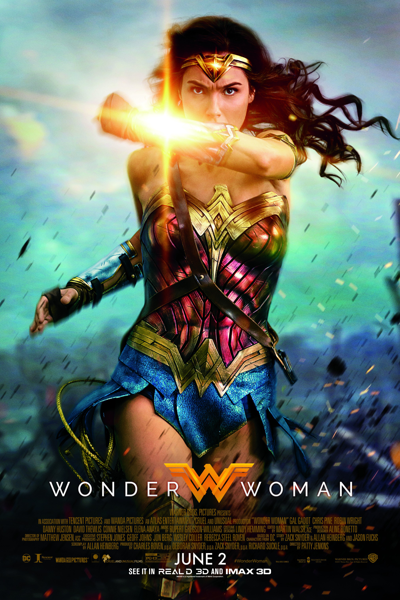

In [157]:
# Reading image form url
image = Image.open(requests.get('https://m.media-amazon.com/images/M/MV5BMTYzODQzYjQtNTczNC00MzZhLTg1ZWYtZDUxYmQ3ZTY4NzA1XkEyXkFqcGdeQXVyODE5NzE3OTE@._V1_.jpg', stream=True).raw)
image_logow = image.resize((400,600))
image_textw = image.resize((400,600))
image_logow

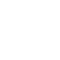

In [158]:
logo = Image.open(requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/White_dot.svg/1200px-White_dot.svg.png', stream=True).raw)
logo = logo.resize((60,60))
logo

In [159]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [160]:
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)-250
left_x = center_x - int(w_logo / 2)-150
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [161]:
bottom_y, right_x

(80, 80)

In [164]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

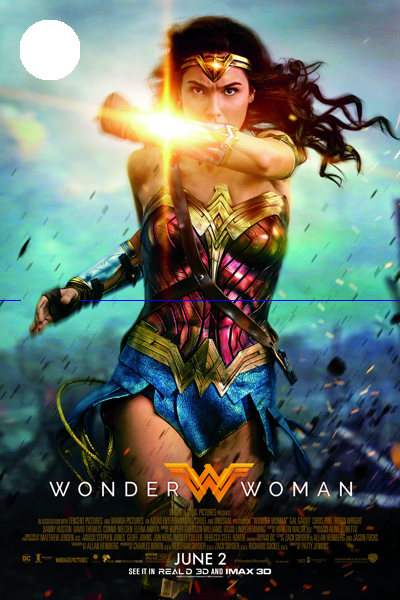

In [165]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

In [194]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Duygu', org=(w_image-380, h_image-550), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.8,
            color=(124,64,210), thickness=2, lineType=cv2.LINE_4); 

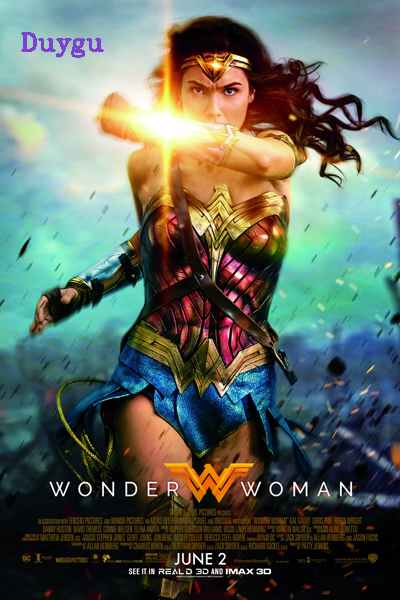

In [195]:
timg = Image.fromarray(image_text, 'RGB')
timg